**Mount Google Drive in Colab to access our model and dataset.**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Install YOLO and Other Dependencies

In [ ]:
!pip install ultralytics  # YOLO package
#!pip install opencv-python-headless  # For image processing

In [ ]:
%cd '/content/drive/MyDrive/40984-CN/'

/content/drive/MyDrive/40984-CN
VLP/data.yaml


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

%ls 'VLP/data.yaml'

In [ ]:
# !unzip 'VLP.v2i.yolov11.zip' -d 'VLP'

VLP/data.yaml


In [ ]:
from ultralytics import YOLO

model = YOLO('yolo11n.pt')  # Start with a base model
model.train(
    data='VLP/data.yaml',       # Path to data config file
    epochs=50,                  # Adjust based on dataset size and performance
    imgsz=640,                  # Image size, adjust if needed
    batch=8,                    # Adjust depending on your hardware
    name='license_plate_detector'   # Name for this training session
)

# Load Your Trained Model for License Plate Detection

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the model
model_path = 'runs/detect/license_plate_detector/weights/best.pt'  # Adjust the path as needed
model = YOLO(model_path)

# Test License Plate Detection on Images


image 1/1 /content/drive/MyDrive/40984-CN/VLP/test/images/1071b237587a698b_jpg.rf.a754fb9c539a59ac64139521007eab1d.jpg: 640x640 1 Licenseplate, 10.7ms
Speed: 2.7ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


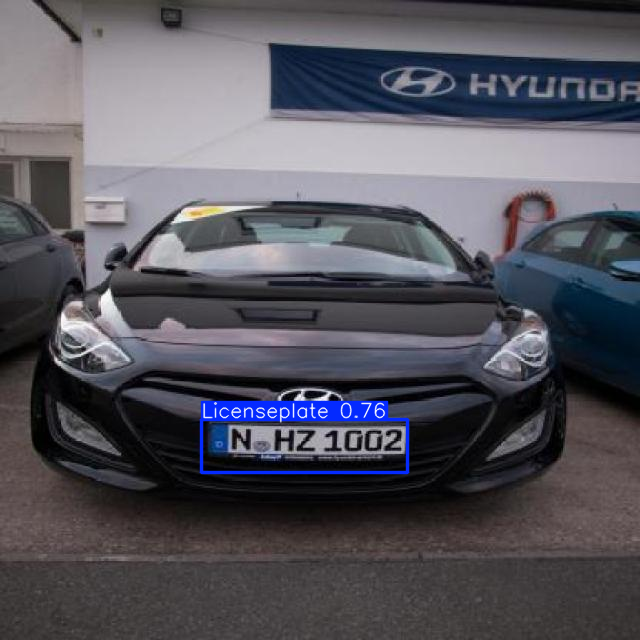

In [ ]:
# Run detection on an example image
image_path = 'VLP/test/images/1071b237587a698b_jpg.rf.a754fb9c539a59ac64139521007eab1d.jpg'  # Adjust as needed

# Perform detection
results = model.predict(image_path)

# Display the image with bounding boxes
annotated_image = results[0].plot()
cv2_imshow(annotated_image)

# Test License Plate Detection on a Video

In [9]:
import cv2
from ultralytics import YOLO
import time

# Load the model
model_path = 'runs/detect/license_plate_detector2/weights/best.pt'  # Adjust to your model's path
model = YOLO(model_path)

# Open the video file
video_path = 'C0142.mp4'  # Adjust as needed
cap = cv2.VideoCapture(video_path)

# Set target resolution (optional, to reduce processing load)
target_width = 1280
target_height = 768

# Process each frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Optionally resize the frame for better processing performance
    if frame.shape[1] != target_width or frame.shape[0] != target_height:
        frame = cv2.resize(frame, (target_width, target_height))

    # Start time for measuring FPS
    start_time = time.time()

    # Run YOLO detection on the frame
    results = model.predict(frame, imgsz=(target_width, target_height))

    # Get the annotated frame with bounding boxes
    annotated_frame = results[0].plot()

    # Display the annotated frame
    cv2.imshow('License Plate Detection', annotated_frame)

    # Print FPS (frames per second) for performance monitoring
    fps = 1.0 / (time.time() - start_time)
    print(f"FPS: {fps:.2f}")

    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close windows
cap.release()
cv2.destroyAllWindows()


0: 480x768 (no detections), 99.7ms
Speed: 13.3ms preprocess, 99.7ms inference, 6.5ms postprocess per image at shape (1, 3, 480, 768)
FPS: 5.16

0: 480x768 (no detections), 66.4ms
Speed: 2.4ms preprocess, 66.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 768)
FPS: 13.77

0: 480x768 (no detections), 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 768)
FPS: 14.72

0: 480x768 (no detections), 51.7ms
Speed: 2.3ms preprocess, 51.7ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 768)
FPS: 17.55

0: 480x768 (no detections), 82.3ms
Speed: 1.6ms preprocess, 82.3ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 768)
FPS: 11.52

0: 480x768 (no detections), 39.5ms
Speed: 2.3ms preprocess, 39.5ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 768)
FPS: 22.39

0: 480x768 (no detections), 41.9ms
Speed: 1.8ms preprocess, 41.9ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 768)
FPS